In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# %cd /content/drive/MyDrive/Kaggle/
# ! kaggle datasets download -d arjunbhasin2013/ccdata

/content/drive/MyDrive/Kaggle
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 31.3MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering 
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/ccdata/CC GENERAL.csv')

In [ ]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
data.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6])

In [ ]:
data.TENURE.value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [ ]:
data.PURCHASES_TRX.unique()

array([  2,   0,  12,   1,   8,  64,   5,   3,   6,  26,  11,   9,  92,
        17,  13,  45,  14,  41,  27,  20,  87,  18,   4,  42,  61,  33,
         7,  50,  22,  23,  60,  46,  75,  31,  10,  34,  81,  25,  85,
       217,  19,  52, 216,  97,  24,  77, 130,  90,  44,  39,  15,  30,
        36, 123, 151,  21, 101,  49,  98,  28,  84,  93,  72,  38,  99,
        62,  48,  16,  32,  51,  74,  29,  59,  76,  47, 126, 229,  40,
       103, 121, 157, 114,  53,  83,  43,  54, 222,  66, 141,  37,  79,
        70,  80, 194, 117, 100, 111,  67, 219,  55, 152, 104, 182,  88,
        82,  71,  78,  35, 122, 105, 108,  69, 175, 135,  91,  65,  68,
       119,  63, 140, 113, 358,  58, 248, 129,  56,  89,  57, 139, 176,
       136, 195,  73, 109, 208, 115, 110, 147, 273, 102, 185, 171, 168,
       232,  95,  86, 148, 112, 128, 254, 198, 298, 154, 116, 142, 131,
       347, 204, 200,  94, 118, 344, 162, 308, 199, 309,  96, 274, 224,
       143, 133, 127, 186])

In [ ]:
data.CASH_ADVANCE_TRX.unique()

array([  0,   4,   1,   3,   6,  13,   5,  16,  10,   2,  11,   7,  12,
        37,  27,  23,  21,  14,  40,   8,   9,  26,  15,  18,  28,  24,
        20,  17,  22,  31, 123,  52,  51,  62,  19,  25,  30,  29,  53,
        45,  43,  42, 107,  38,  56,  39,  32,  33,  50,  34,  63,  36,
       110,  47,  48,  71,  35,  93,  80,  44,  61,  46,  49,  69,  41])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [ ]:
data[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].isna().sum()

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

cl_imputer = SimpleImputer(strategy='mean')
data["CREDIT_LIMIT"] = cl_imputer.fit_transform(data["CREDIT_LIMIT"].to_numpy().reshape(-1,1))

mp_imputer = SimpleImputer(strategy='mean')
data["MINIMUM_PAYMENTS"] = mp_imputer.fit_transform(data["MINIMUM_PAYMENTS"].to_numpy().reshape(-1,1))

In [ ]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

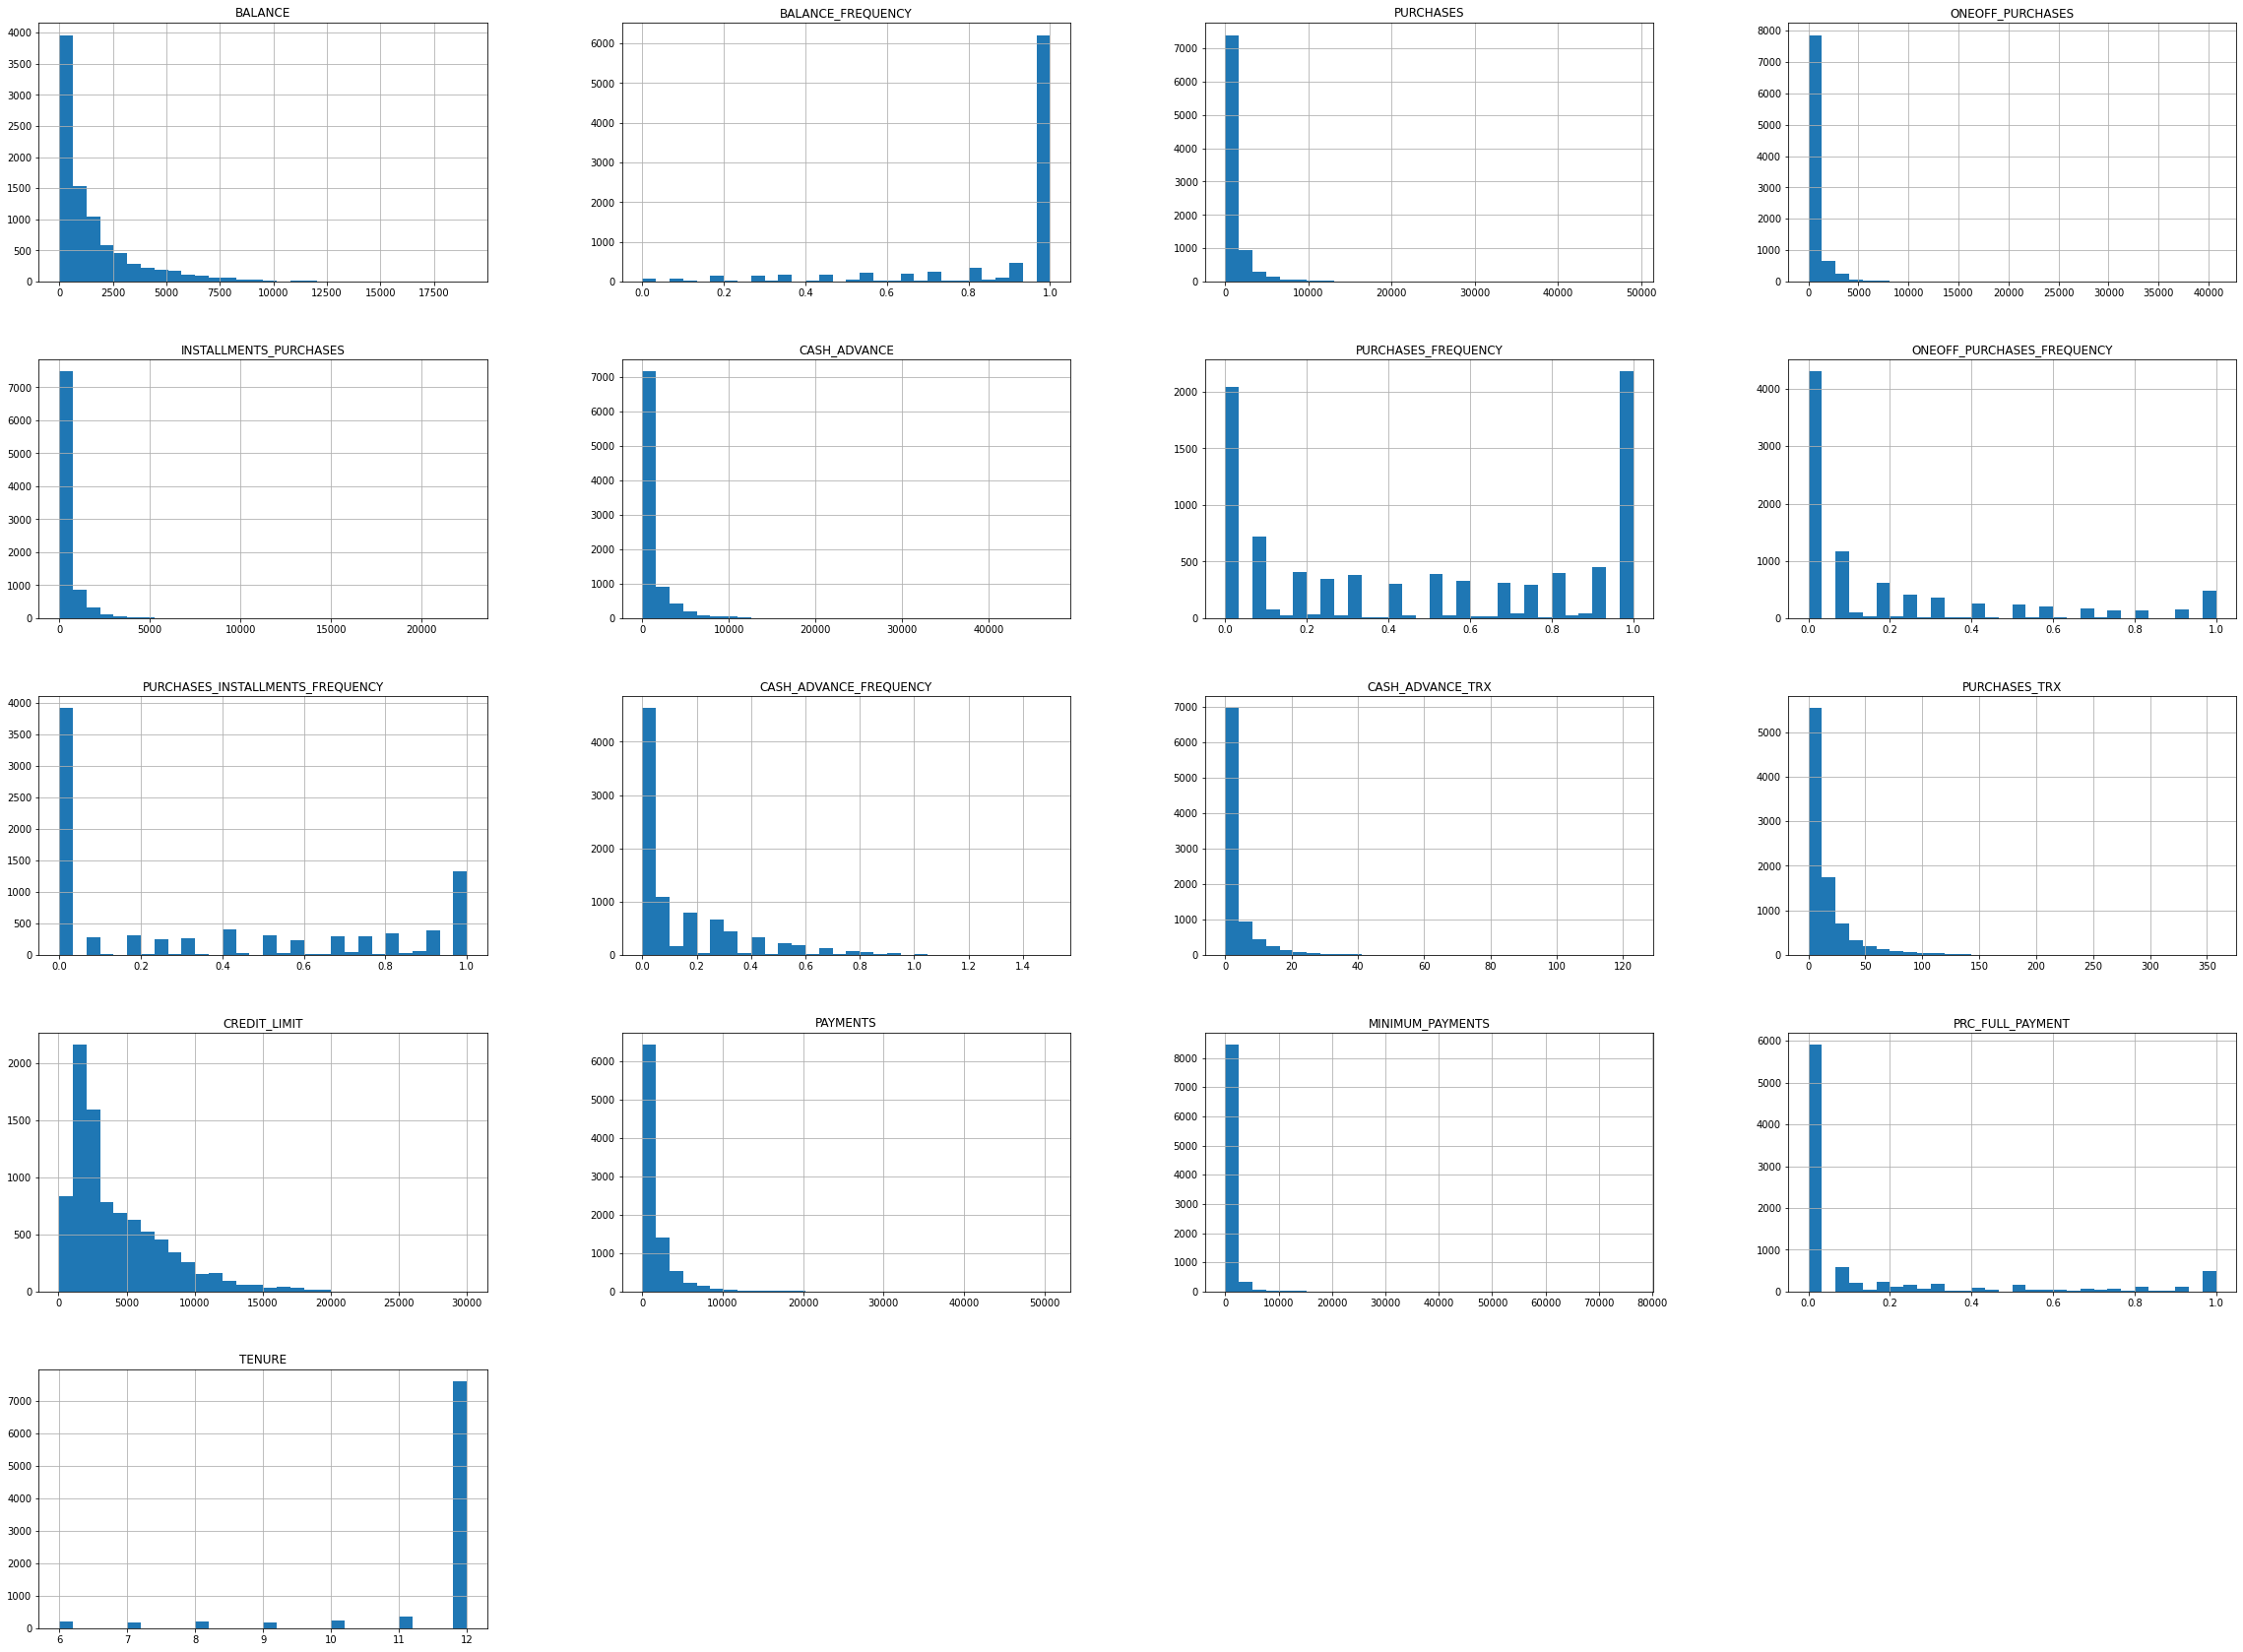

In [ ]:
data.hist(figsize=(40,30),bins=30)
plt.show()

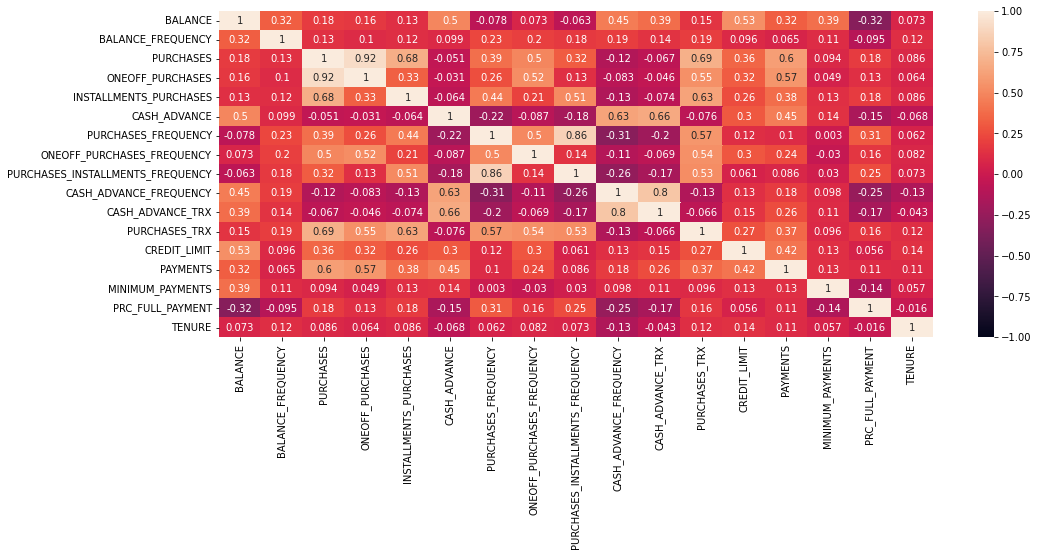

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data = data.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

In [ ]:
duplicateRows = data[data.duplicated(subset = data.columns.difference(['CUST_ID']))]
duplicateRows.shape

(0, 18)

In [ ]:
Ids = data['CUST_ID'] 
data.drop(columns=['CUST_ID'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


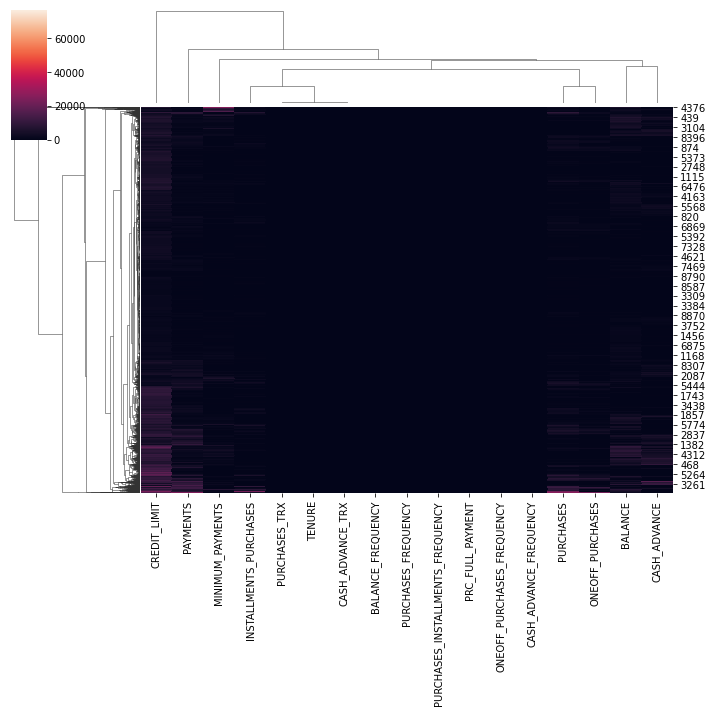

In [ ]:
sns.clustermap(data)

In [ ]:
numQuantiles = 80
colsQuantiles = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

def createQuantiles(dfColumn, numQuantiles):
  return pd.qcut(dfColumn, numQuantiles, labels=False, duplicates='drop')

for string in colsQuantiles:
  data[string] = createQuantiles(data[string], numQuantiles)

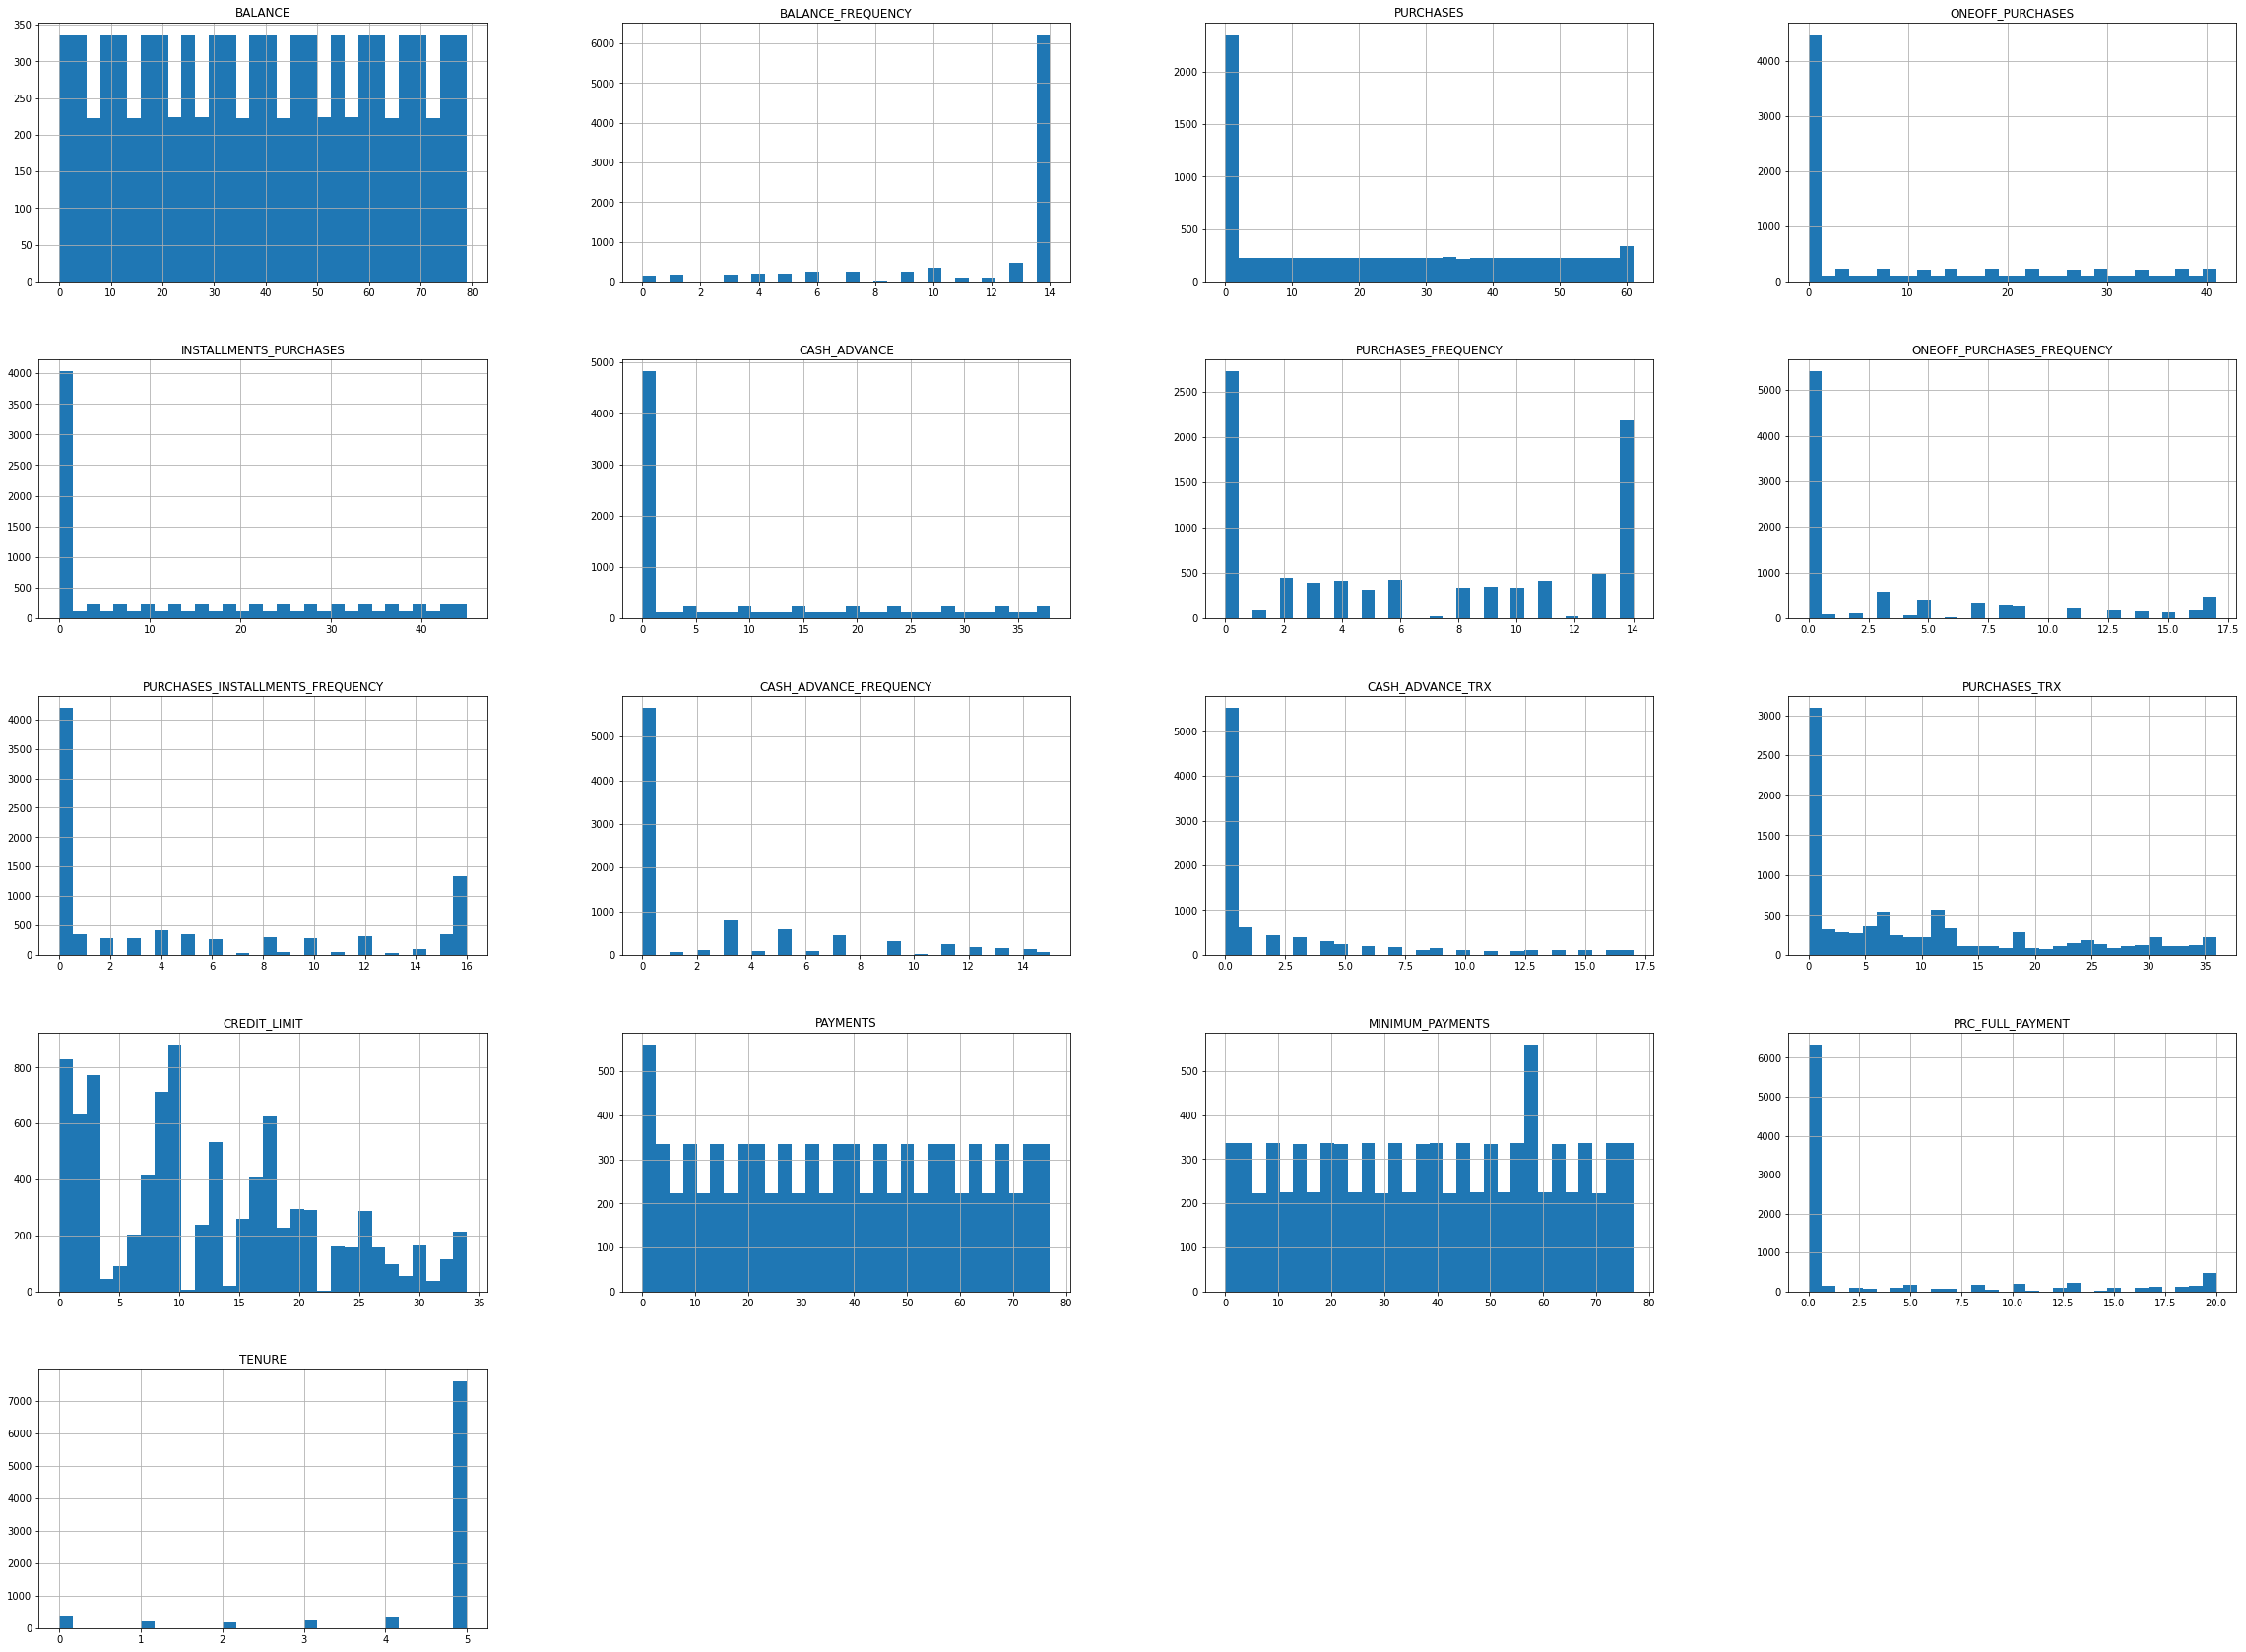

In [ ]:
data.hist(figsize=(40,30),bins=30)
plt.show()

In [ ]:
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0          11                 10          6                 0   
1          68                 13          0                 0   
2          63                 14         35                25   
3          55                  7         46                33   
4          38                 14          0                 0   
...       ...                ...        ...               ...   
8945        9                 14         18                 0   
8946        6                 14         18                 0   
8947        7                 11          9                 0   
8948        5                 11          0                 0   
8949       29                  8         41                29   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                          6             0                    2   
1                          0            36                    0   
2                          0             0                   14   
3                          0             6                    0   
4                          0             0                    0   
...                      ...           ...                  ...   
8945                      18             0                   14   
8946                      18             0                   14   
8947                       9             0                   11   
8948                       0             0                    0   
8949                       0             4                    9   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                              0                                 0   
1                              0                                 0   
2                             17                                 0   
3                              0                                 0   
4                              0                                 0   
...                          ...                               ...   
8945                           0                                12   
8946                           0                                12   
8947                           0                                 8   
8948                           0                                 0   
8949                          13                                 0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                          0                 0              1             1   
1                          5                 3              0            20   
2                          0                 0             11            21   
3                          0                 0              0            21   
4                          0                 0              0             2   
...                      ...               ...            ...           ...   
8945                       0                 0              5             1   
8946                       0                 0              5             1   
8947                       0                 0              4             1   
8948                       3                 1              0             0   
8949                       7                 1             21             2   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0            7                12                 0      12  
1           70                63                 8      12  
2           29                52                 0      12  
3            0                58                 0      12  
4           32                33                 0      12  
...        ...               ...               ...     ...  
8945        14                 2                13       6  
8946        11                58                 0       6  
8947         1                 4                 8       6  
8948         0      

In [ ]:
# log_trans_cols = ['BALANCE','PURCHASES_TRX','CASH_ADVANCE_TRX','PAYMENTS']

# for col in log_trans_cols:
#   data[col + '_trans'] = data[col].transform(np.log)

In [ ]:
# data.hist(column=['BALANCE_trans','PURCHASES_TRX_trans','CASH_ADVANCE_TRX_trans','PAYMENTS_trans'],bins=30,range=[-10,10])
# plt.show()

In [ ]:
# data['BALANCE_trans'] = 1/data['BALANCE_trans']

In [ ]:
# data['BALANCE_trans']

0       0.269458
1       0.123890
2       0.127843
3       0.134797
4       0.149109
          ...   
8945    0.298536
8946    0.338520
8947    0.317191
8948    0.384683
8949    0.168896
Name: BALANCE_trans, Length: 8950, dtype: float64

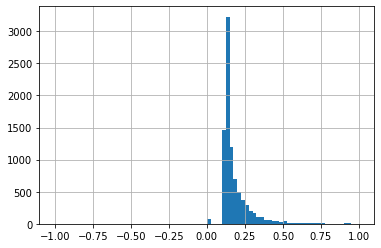

In [ ]:
data.BALANCE_trans.hist(bins=80,range=[-1,1])

In [ ]:
# data.BALANCE_trans.max()

52.61160592347147

In [ ]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


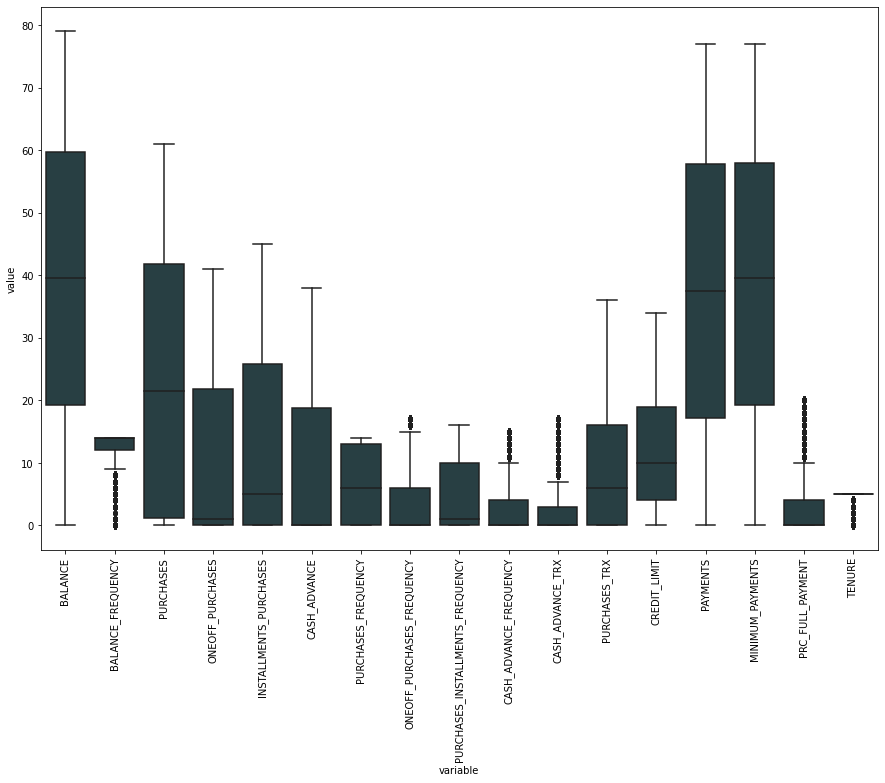

In [ ]:
NumericData = data[[feature for feature in numerical_features if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
# plt.figtext(0.1, 1, "Boxplots for Numerical variables", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['#244247']*len(numerical_features))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
train_data = data.copy()
scale = StandardScaler()
train_data = scale.fit_transform(train_data)

In [ ]:
train_data

array([[-1.23405464, -0.5314264 , -0.87047158, ..., -1.20258504,
        -0.54485054,  0.36067954],
       [ 1.23405464,  0.26808045, -1.16662726, ...,  1.07053539,
         0.69273903,  0.36067954],
       [ 1.01755382,  0.53458274,  0.56094753, ...,  0.58025451,
        -0.54485054,  0.36067954],
       ...,
       [-1.40725529, -0.26492411, -0.72239374, ..., -1.55915295,
         0.69273903, -4.12276757],
       [-1.49385561, -0.26492411, -1.16662726, ..., -1.64829492,
         0.69273903, -4.12276757],
       [-0.45465171, -1.06443097,  0.85710321, ..., -1.51458196,
        -0.54485054, -4.12276757]])

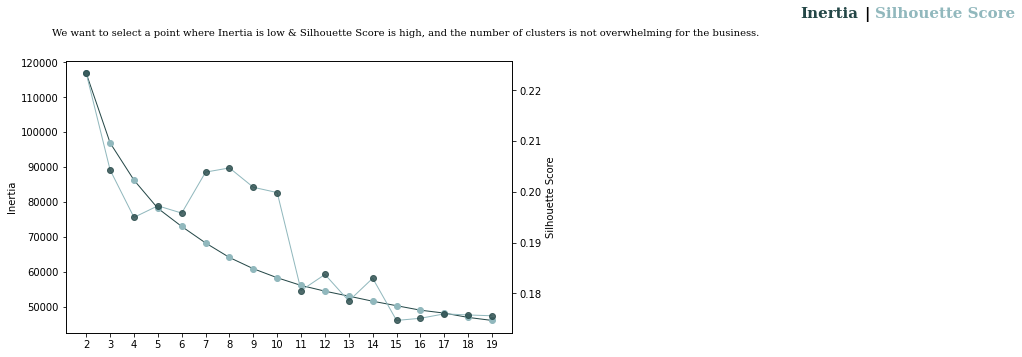

In [ ]:
inertia=[]
silhouetteScore = []
n_clusters = 20
for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(train_data, kmeans.predict(train_data)))

fig, ax1 = plt.subplots(figsize=(8, 5))
#fig.text(0.1, 1, 'Skipping ', fontfamily='serif', fontsize=12, fontweight='bold')
fig.text(0.1, 0.95, 'We want to select a point where Inertia is low & Silhouette Score is high, and the number of clusters is not overwhelming for the business.',
         fontfamily='serif',fontsize=10)
fig.text(1.4, 1, 'Inertia', fontweight="bold", fontfamily='serif', fontsize=15, color='#244747')
fig.text(1.51, 1, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(1.53, 1, 'Silhouette Score', fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

ax1.plot(range(2, n_clusters), inertia, '-', color='#244747', linewidth=1)
ax1.plot(range(2, n_clusters), inertia, 'o', color='#91b8bd')
ax1.set_ylabel('Inertia')
ax1.set_xticks(range(2,31))

ax2 = ax1.twinx()
ax2.plot(range(2, n_clusters), silhouetteScore, '-', color='#91b8bd', linewidth=1)
ax2.plot(range(2, n_clusters), silhouetteScore, 'o', color='#244747', alpha=0.8)
ax2.set_ylabel('Silhouette Score')

plt.xlabel('Number of clusters')
plt.show()

In [ ]:
def plot_clusters(pca, clusters):
  plt.figure(figsize=(15,8))
  sns.scatterplot(x=pca[:, 0], y=pca[:, 1], 
                  hue=clusters, palette=sns.color_palette('hls', len(np.unique(clusters))), s=50,legend=False)
  plt.title('Cluster of Customers', size=15, pad=10)
  plt.legend(loc=0, bbox_to_anchor=[1,1])
  plt.show()

In [ ]:
km_model = KMeans(n_clusters=8, init='k-means++', random_state=0, algorithm='elkan')
y = km_model.fit_predict(train_data)

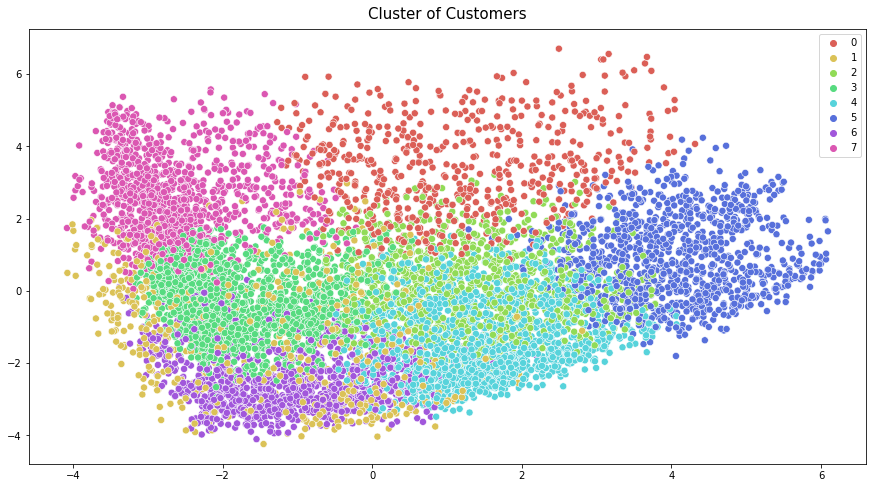

In [ ]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(train_data)
X_PCA = pca.transform(train_data)

plot_clusters(X_PCA, y)

In [ ]:
dist = 1-cosine_similarity(train_data)

import plotly.express as px

pca = PCA(3)
pca.fit(train_data)
X_PCA = pca.transform(train_data)

# Visualizing all the clusters 
fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color=y, opacity=0.8)
fig.show()

In [ ]:
from sklearn.cluster import AffinityPropagation

ap_model = AffinityPropagation()
ap_y = ap_model.fit_predict(train_data)

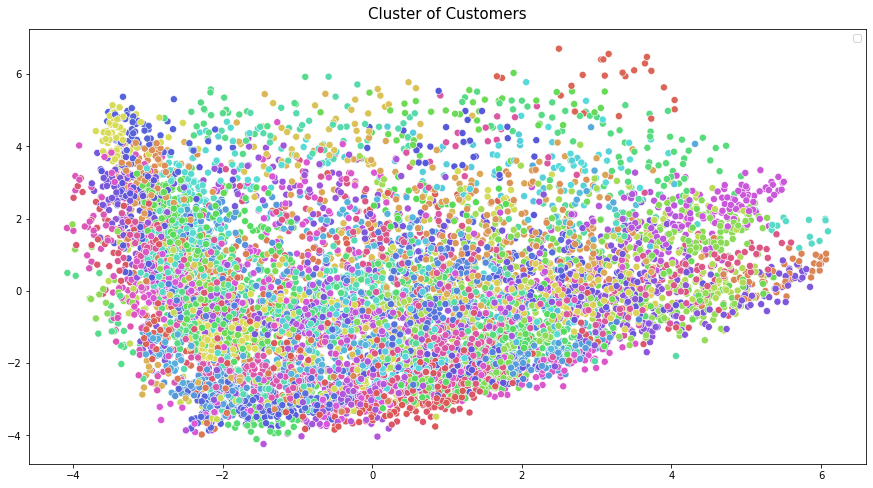

In [ ]:
ap_pca = PCA(2)
ap_pca.fit(train_data)
apX_PCA = ap_pca.transform(train_data)

plot_clusters(apX_PCA, ap_y)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac_model = AgglomerativeClustering(n_clusters=8)
ac_y = ac_model.fit_predict(train_data)

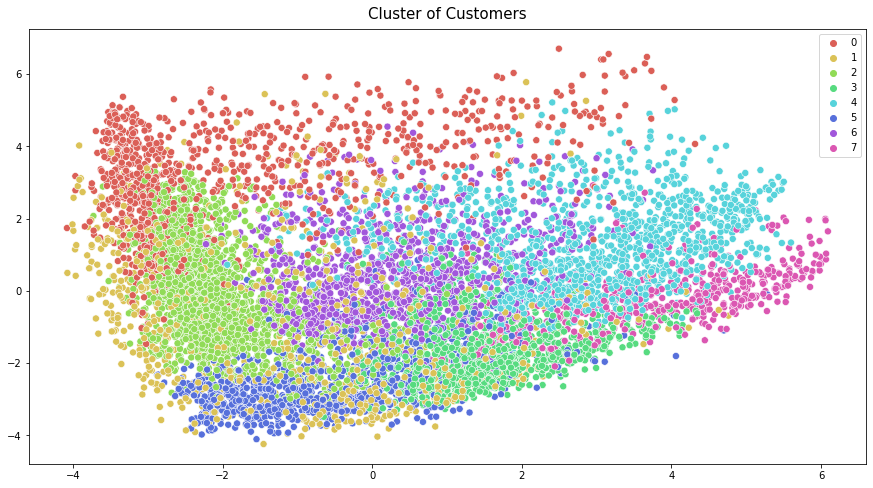

In [ ]:
ac_pca = PCA(2)
ac_pca.fit(train_data)
acX_PCA = ac_pca.transform(train_data)

plot_clusters(acX_PCA, ac_y)

In [ ]:
from sklearn.cluster import Birch

b_model = Birch(n_clusters=8)
b_y = b_model.fit_predict(train_data)

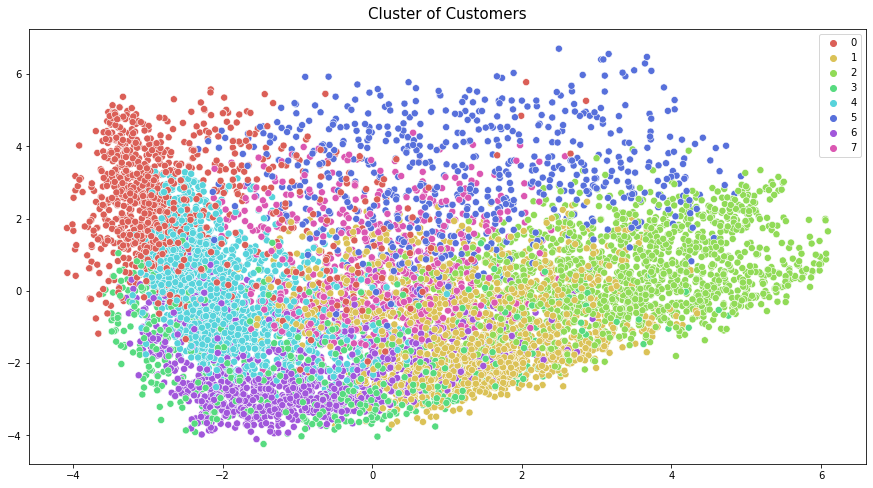

In [ ]:
b_pca = PCA(2)
b_pca.fit(train_data)
bX_PCA = b_pca.transform(train_data)

plot_clusters(bX_PCA, b_y)

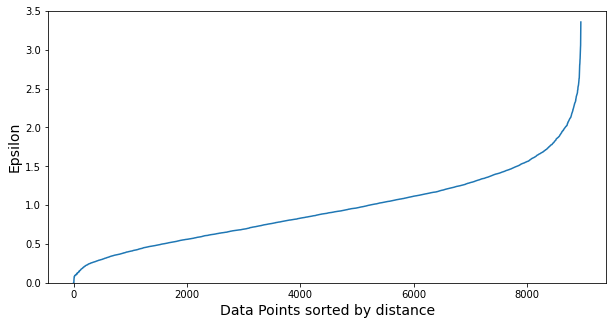

In [ ]:
from sklearn.neighbors import NearestNeighbors

# finding nearest points distance for every row in data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_data)
distances, indices = nbrs.kneighbors(train_data)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p = max(distances) + 0.5
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.ylim([0,3.5])
plt.show()

In [ ]:
dbs_model = DBSCAN(eps=1.75, min_samples=10) 
dbs_y = dbs_model.fit_predict(train_data)

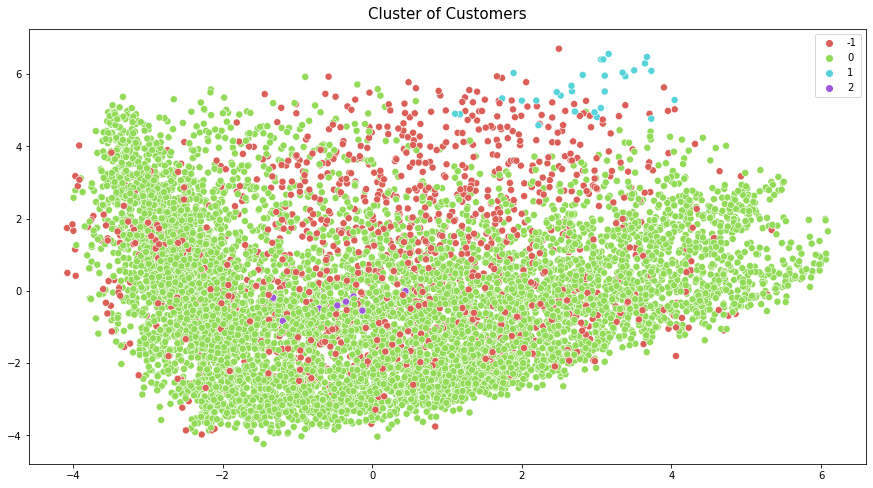

In [ ]:
dbs_pca = PCA(2)
dbs_pca.fit(train_data)
dbsX_PCA = dbs_pca.transform(train_data)

plot_clusters(dbsX_PCA, dbs_y)

In [ ]:
from sklearn.cluster import MeanShift

ms_model = MeanShift() 
ms_y = ms_model.fit_predict(train_data)

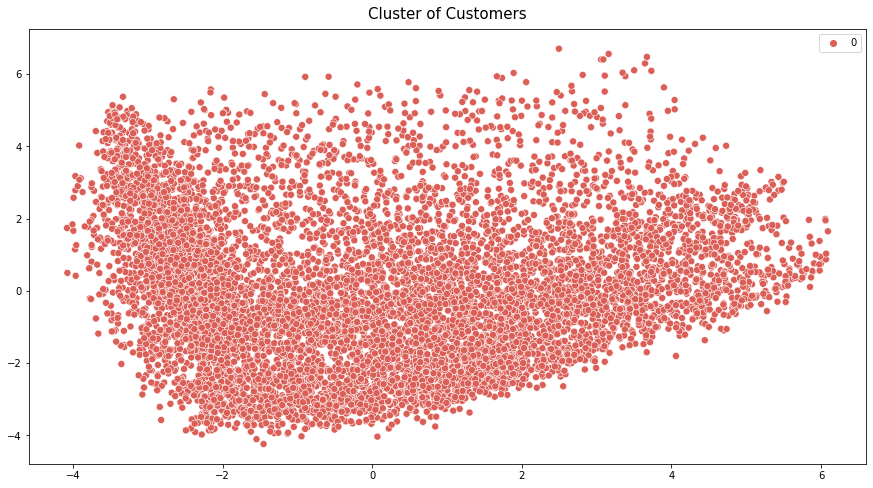

In [ ]:
ms_pca = PCA(2)
ms_pca.fit(train_data)
msX_PCA = ms_pca.transform(train_data)

plot_clusters(msX_PCA, ms_y)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

mbk_model = MiniBatchKMeans(n_clusters=7) 
mbk_y = mbk_model.fit_predict(train_data)

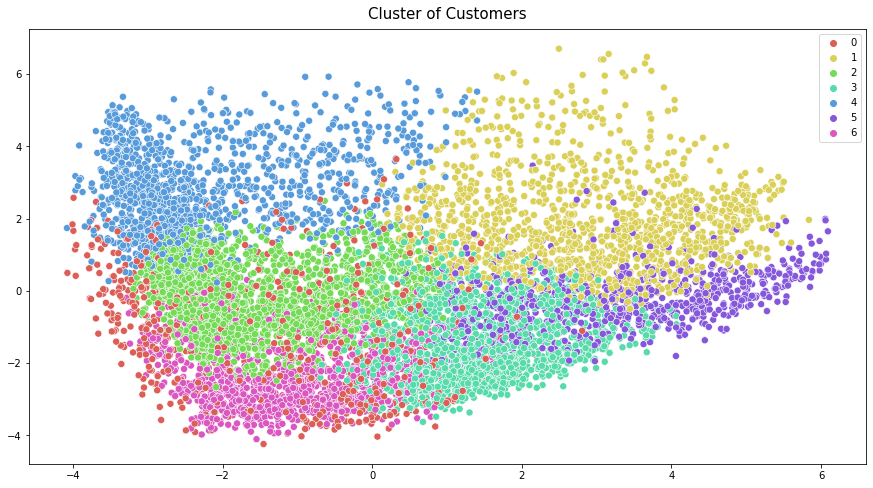

In [ ]:
mbk_pca = PCA(2)
mbk_pca.fit(train_data)
mbkX_PCA = mbk_pca.transform(train_data)

plot_clusters(mbkX_PCA, mbk_y)